### Fenics

In [1]:
"""
FEniCS tutorial demo program: Deflection of a membrane.

  -Laplace(w) = p  in the unit circle
            w = 0  on the boundary

The load p is a Gaussian function centered at (0, 0.6).
"""

'\nFEniCS tutorial demo program: Deflection of a membrane.\n\n  -Laplace(w) = p  in the unit circle\n            w = 0  on the boundary\n\nThe load p is a Gaussian function centered at (0, 0.6).\n'

In [2]:
from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np

In [3]:
# Create mesh and define function space
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 2)

# Define boundary condition
w_D = Constant(0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w_D, boundary)

# Define load
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',
               degree=1, beta=beta, R0=R0)

# Define variational problem
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

# Compute solution
w = Function(V)
solve(a == L, w, bc)

# Plot solution
p = interpolate(p, V)

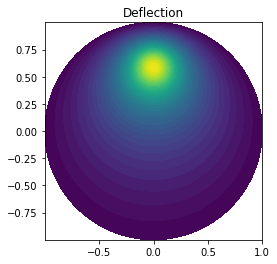

In [4]:
plot(w, title='Deflection')

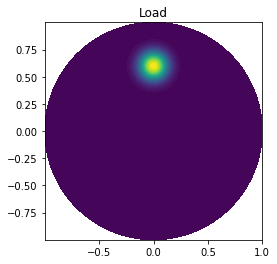

In [5]:
plot(p, title='Load')

In [7]:
# Save solution to file in VTK format
vtkfile_w = File('poisson_membrane/deflection.pvd')
vtkfile_w << w
vtkfile_p = File('poisson_membrane/load.pvd')
vtkfile_p << p

In [4]:
# Curve plot along x = 0 comparing p and w
import numpy as np
import matplotlib.pyplot as plt

NameError: name 'interactive' is not defined

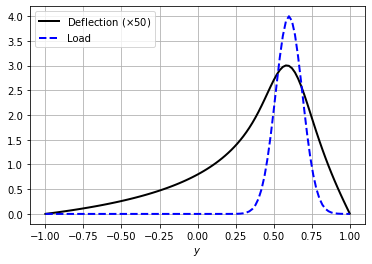

In [6]:
tol = 0.001  # avoid hitting points outside the domain

y = np.linspace(-1 + tol, 1 - tol, 101)

points = [(0, y_) for y_ in y]  # 2D points

w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])

plt.plot(y, 50*w_line, 'k', linewidth=2)  # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)

plt.grid(True)
plt.xlabel('$y$')

plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')

plt.savefig('poisson_membrane/curves.pdf')
plt.savefig('poisson_membrane/curves.png')

# Hold plots
interactive()
plt.show()